In [1]:
import pickle
filepath_no_slide = '/media/3tb/jason/pybullet_data/env6_td_pnp_push_limited/no_slide_demos_0.pkl'
filepath_no_drawer = '/media/3tb/jason/pybullet_data/env6_td_pnp_push_limited/no_drawer_demos_0.pkl'
filepath_no_pnp = '/media/3tb/jason/pybullet_data/env6_td_pnp_push_limited/no_pnp_demos_0.pkl'
demo_no_slide = pickle.load(open(filepath_no_slide, 'rb'))
demo_no_drawer = pickle.load(open(filepath_no_drawer, 'rb'))
demo_no_pnp = pickle.load(open(filepath_no_pnp, 'rb'))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def combine_images(images, ncol=10):
    shape = list(images[0].shape)
    n = len(images)
    if n % ncol != 0:
        shape[1] *= ncol - n % ncol
        images.append(np.zeros(shape, dtype=np.uint8))
    nrow = np.ceil(n / ncol)
    images = np.concatenate(images, axis=1)
    images = np.concatenate(np.split(images, nrow, axis=1), axis=0)
    return images

def obs2img(obs):
    obs = obs.reshape(3, 48, 48)
    return np.transpose(obs, (2, 1, 0))

def plot_trajectory(observations, indices):
    images = [obs2img(observations[i]) for i in indices]
    images = combine_images(images)
    fig, ax = plt.subplots(figsize=(25, 50))
    ax.imshow(images)
    fig.show()
    

/home/jason/miniconda3/envs/pybullet/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


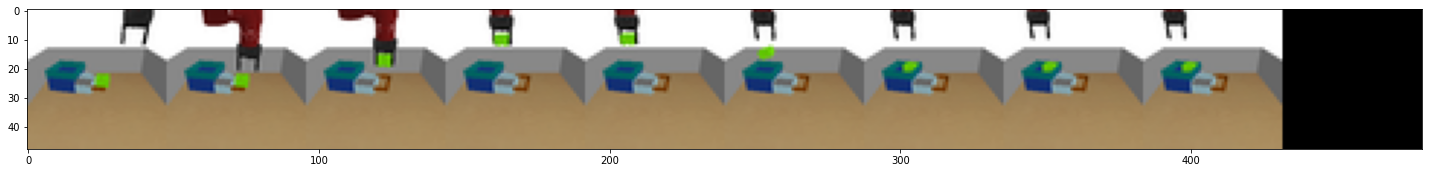

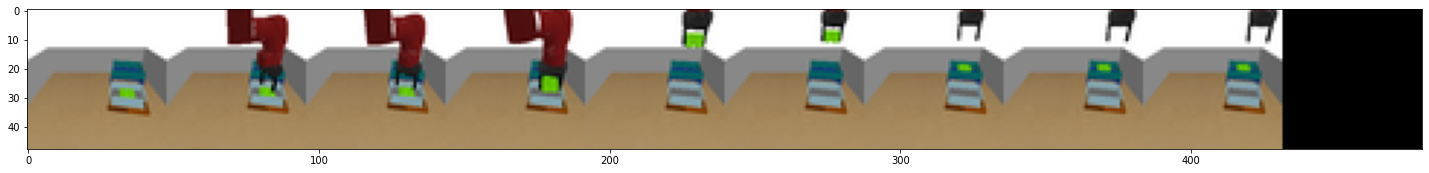

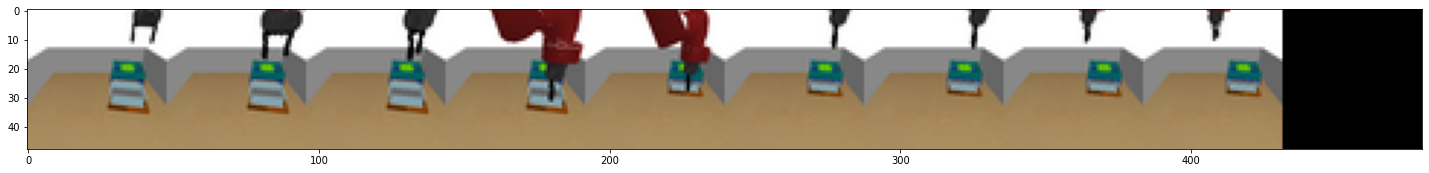

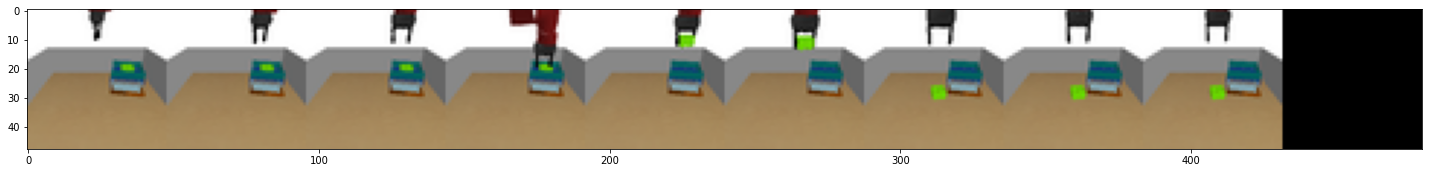

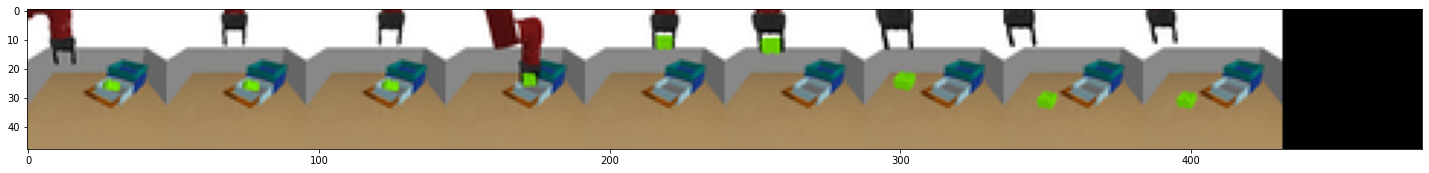

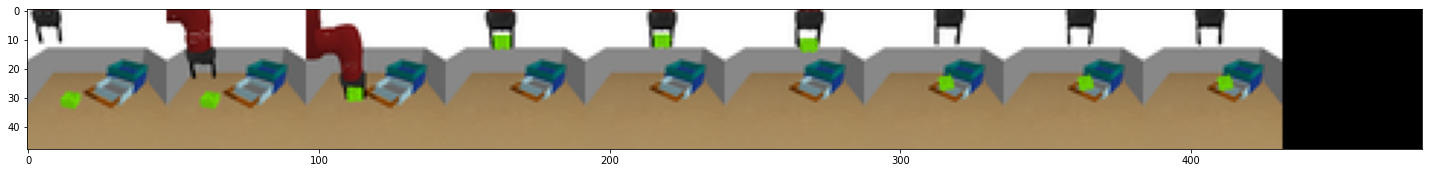

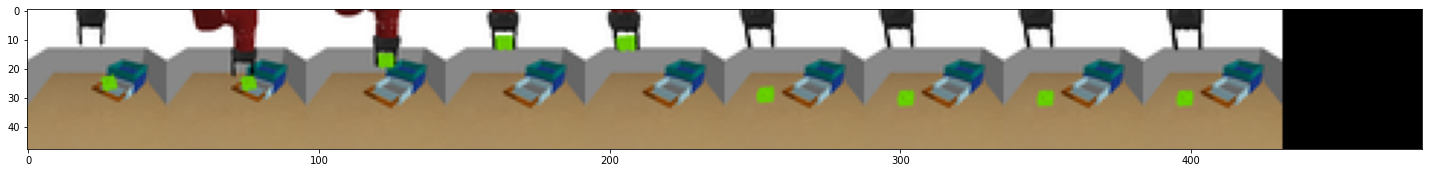

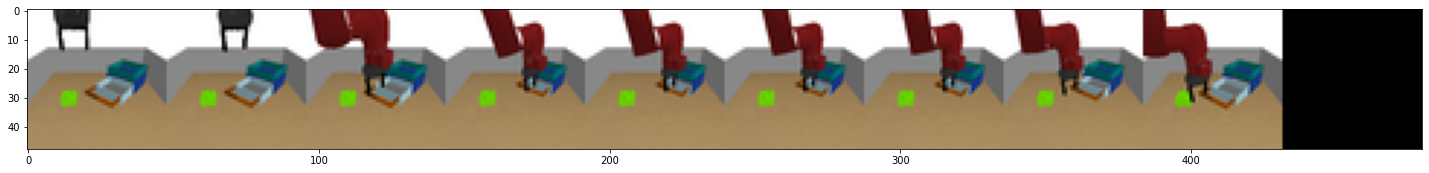

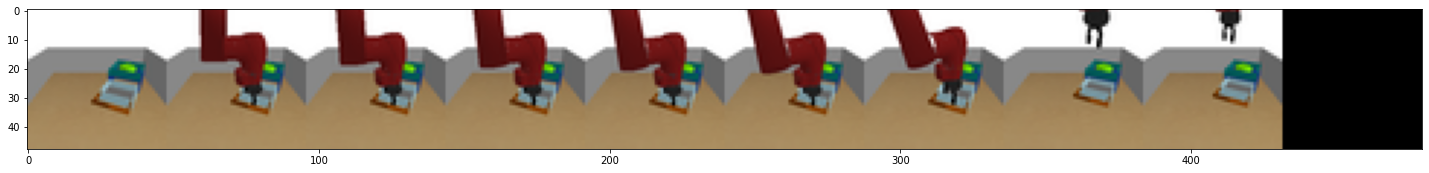

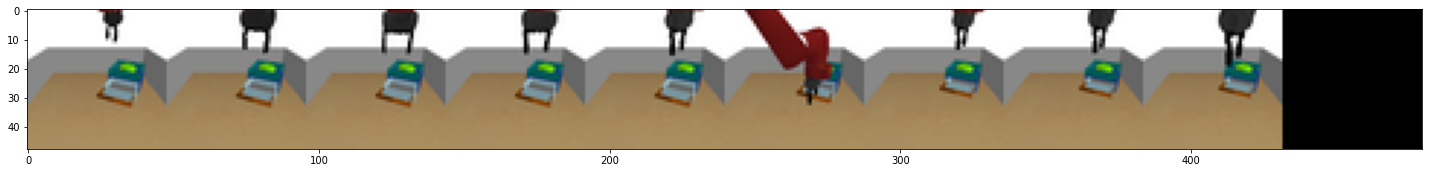

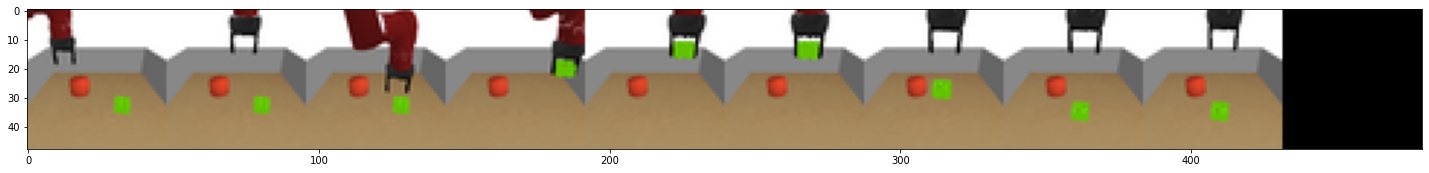

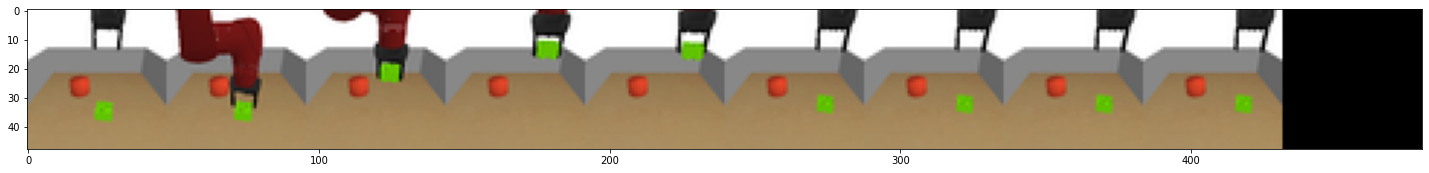

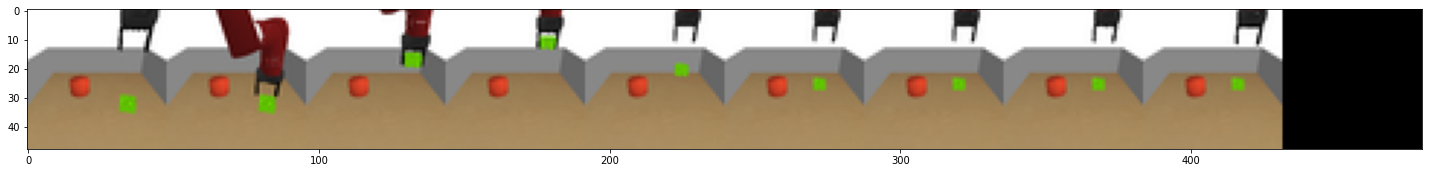

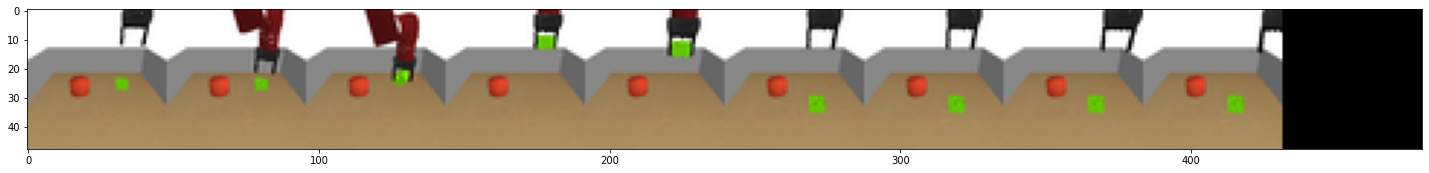

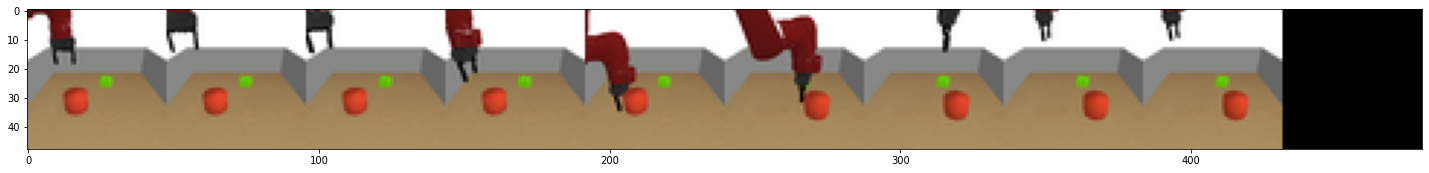

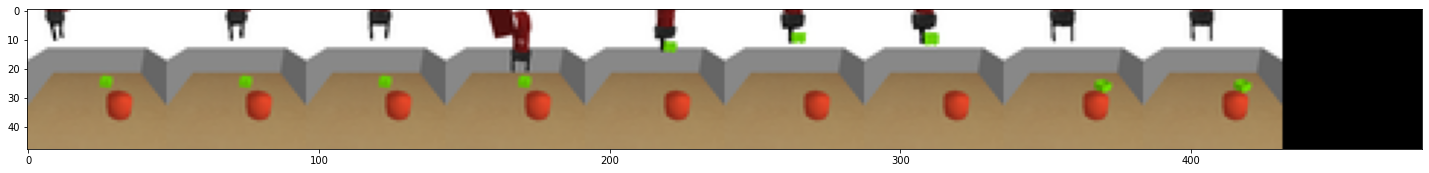

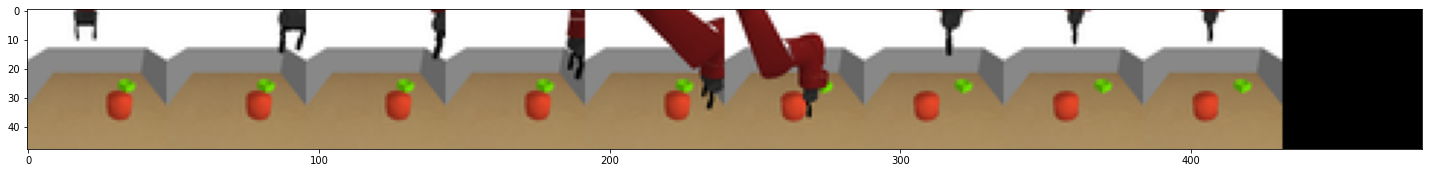

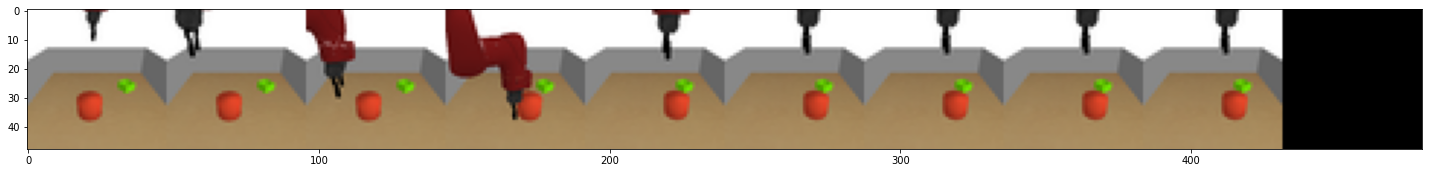

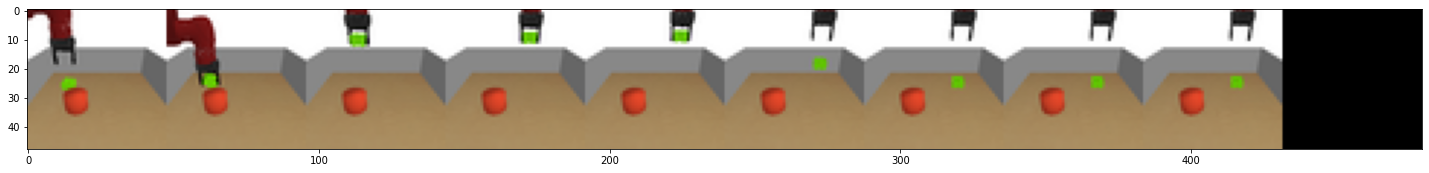

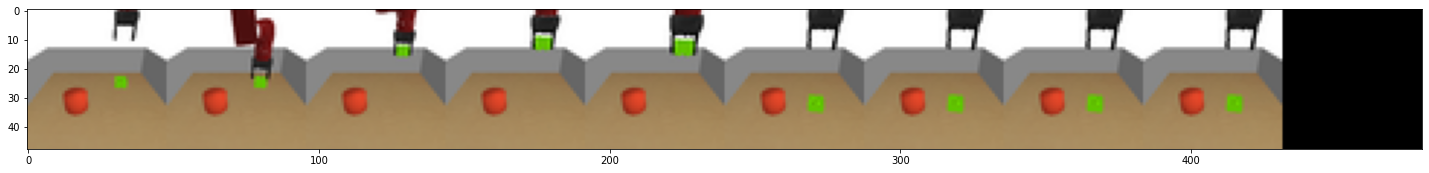

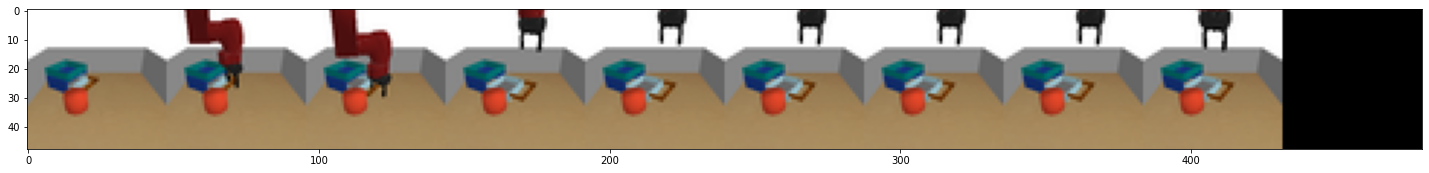

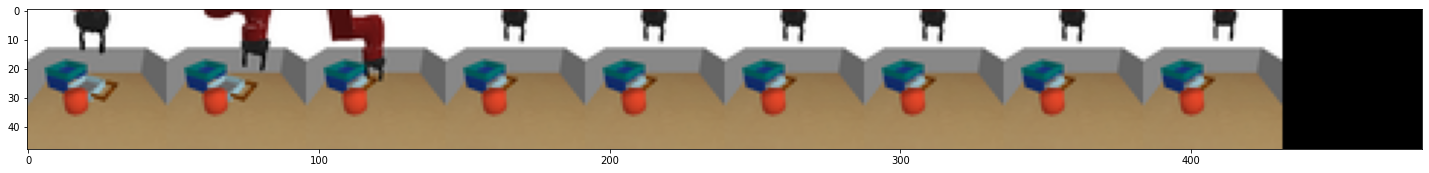

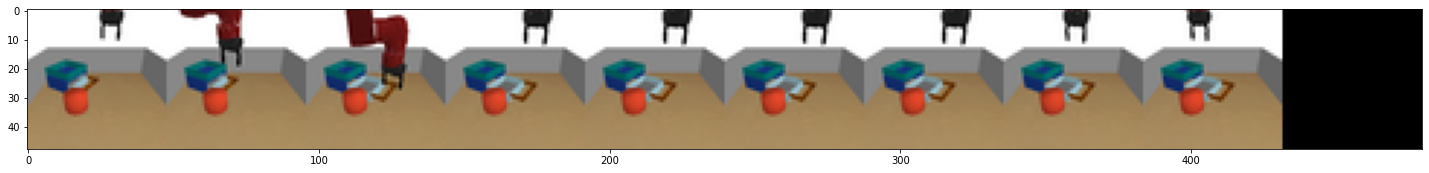

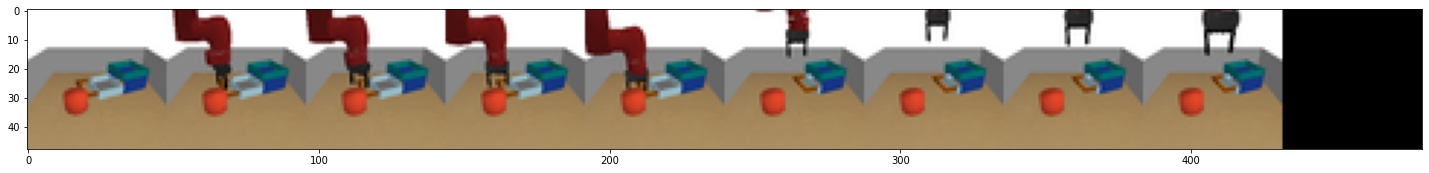

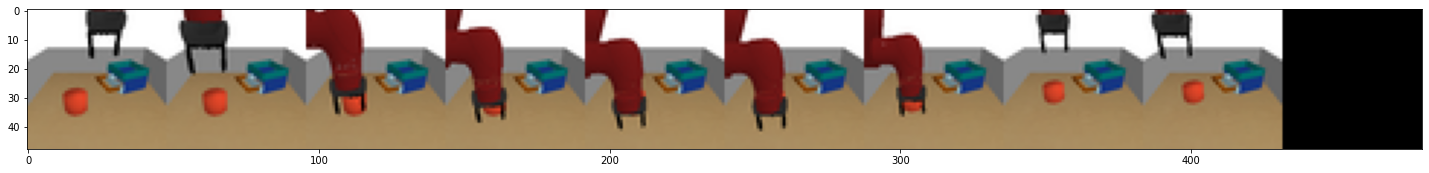

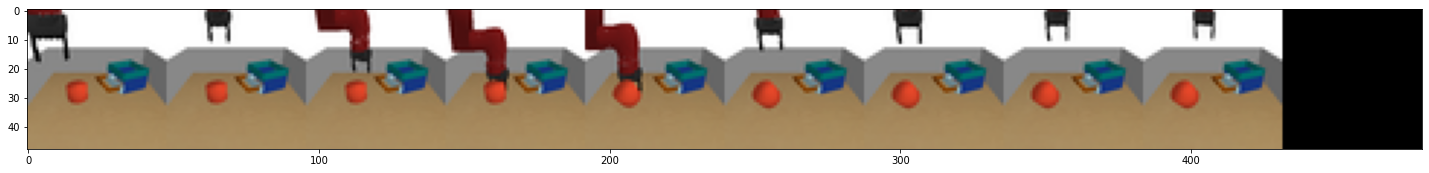

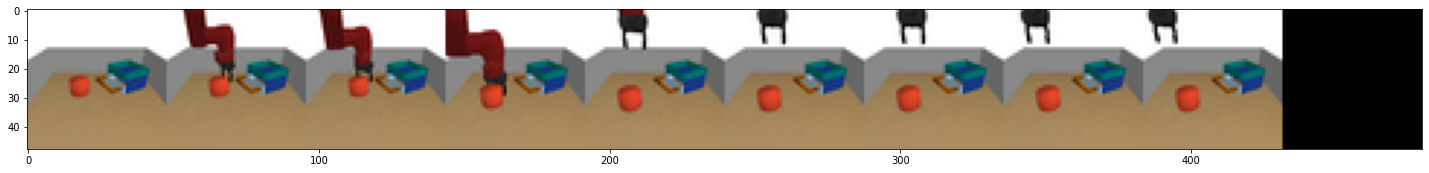

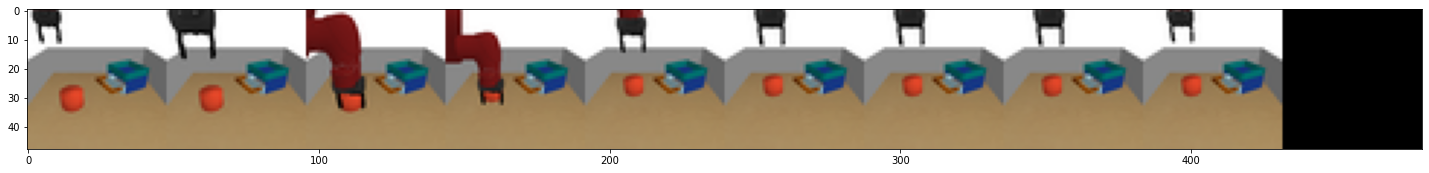

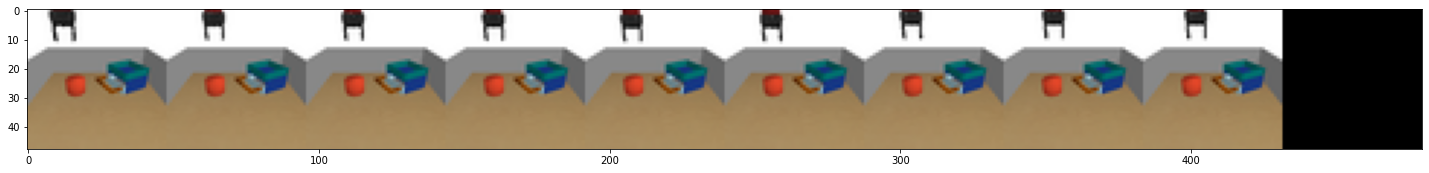

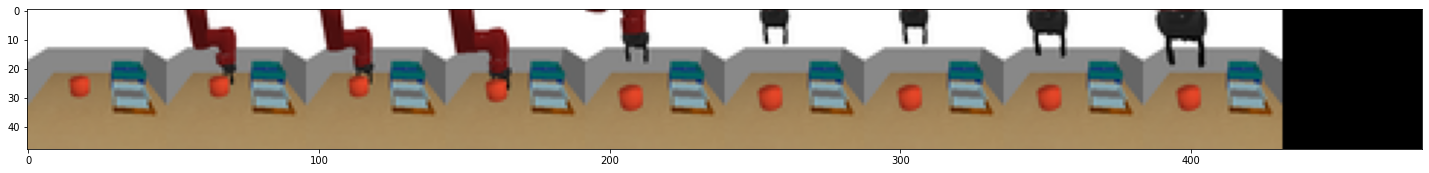

In [25]:
tran_idxs = [0, 10, 20, 30, 40, 50, 60, 70, -1]

for demo in [demo_no_slide, demo_no_drawer, demo_no_pnp]:
    for traj_idx in range(40, 50):
        observations = (lambda obs: [obs[i]['image_observation'] for i in range(len(obs))])(demo[traj_idx]['observations'])
        plot_trajectory(observations, tran_idxs)